# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Зырянов Виталий. Вариант №8

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения


**Модель линейной регрессии представляет собой уравнение прямой:**

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$

**Несмещённая оценка дисперсии $(S^{2})$:**

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

$SS_{e}=RSS(\widehat{\beta})$, а r-ранг матрицы X

**Сумма квадратов остатков (SSR):**
$$SSR = \sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip}))^2$$
$$\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=\overline{1,m}$$

**МНК:**  
Основная идея МНК - минимизация векторая ошибок регресионных моделей
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

Нормальные уравнения:
$$XX^{\intercal}\beta=XY$$

Решение системы нормальных уравнений в регулярном случае:
$$\hat{\beta}=(XX^{\intercal})^{-1}XY$$

**Дно функции параметра:**

  $\psi(\beta) = C^T\beta$

  Будем говорить, что функция параметра $\psi(\beta) = C^T\beta$ допускает несмещенное оценивание(ДНО), если:

  $\exists \ L(y) = BY: \forall \beta \ \mathbb{E}_\beta L(Y) = C^T\beta$

**Несмещённая оценка дисперсии:**

$$ s^2 = \frac{RSS(\hat{\beta})}{n-r} $$

где r - ранг матрицы X

**Проверка гипотез:**    

Основная гипотеза $H_0:\psi=0$

F-cтатистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$, где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, где $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы, $SS_e=RSS(\hat{\beta})$

**Доверительный эллипсойд уровня доверия $1 -\alpha$ функции параметра $\psi$:**

$$ \mathrm{A}_{\alpha} = \left\{\vec{x}:(\vec{x}-\hat{\psi})^{\intercal}\mathrm{B}^{-1}(\vec{x}-\hat{\psi}) \leq \mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}\right\} $$
где $\mathrm{x}_{\alpha}: \mathrm{F}_{q, n-r}(\mathrm{x}_{\alpha})=1-\alpha$


**Доверительный интервал:**  
$\psi = C^T \beta  \\
\frac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} \\
x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} \\
b_\psi = C^T (XX^T)^{-1}C \\
 P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

Искомый интервал: $ [\widehat \psi - x_{\alpha}s\sqrt{b} ; \widehat \psi + x_{\alpha}s\sqrt{b}] $

**Критерий хи-квадрат:**

$$\chi^2 = \sum_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} \sim \chi^{2}_{n-1}$$

**Теорема Колмагорова:**

$$D_{n} = {sup}_{X \in \mathbb R} |F_{0}(X_{i}) - F_{n}(X_{i})|$$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
$\alpha = 0.20; h = 2.30$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

alpha = 0.20
h = 2.30
X = np.array([7, 0, 1, 7, 4, 2, 4, 0, 8, 2, 3, 7, 0, 1, 6, 1, 8, 7, 8, 0, 3, 3, 6, 8, 3, 0, 4, 0, 5, 2, 4, 7, 0, 6, 0, 3, 3, 4, 5, 3, 3, 1, 2, 2, 4, 6, 6, 6, 7, 5])
Y = np.array([9.85, 6.73, 7.77, 5.38, 7.46, 1.95, 9.21, 12.01, 10.10, 0.54, 9.35, 4.20, 9.38, 5.82, 14.22, 6.38, 7.96, 6.75, 7.37, 8.67, 12.68, 6.76, 2.02, 6.46, 2.71, 6.43, 4.35, 6.11, 18.35, 2.92, 2.83, 2.87, 9.45, 6.35, 13.46, 15.79, 7.44, 10.27, 4.05, 8.89, 11.50, 10.78, 17.82, 11.62, 3.89, 5.25, 1.19, 0.29, 15.18, 8.90])

print("Массив X:", X)
print("Массив Y:", Y)



Массив X: [7 0 1 7 4 2 4 0 8 2 3 7 0 1 6 1 8 7 8 0 3 3 6 8 3 0 4 0 5 2 4 7 0 6 0 3 3
 4 5 3 3 1 2 2 4 6 6 6 7 5]
Массив Y: [ 9.85  6.73  7.77  5.38  7.46  1.95  9.21 12.01 10.1   0.54  9.35  4.2
  9.38  5.82 14.22  6.38  7.96  6.75  7.37  8.67 12.68  6.76  2.02  6.46
  2.71  6.43  4.35  6.11 18.35  2.92  2.83  2.87  9.45  6.35 13.46 15.79
  7.44 10.27  4.05  8.89 11.5  10.78 17.82 11.62  3.89  5.25  1.19  0.29
 15.18  8.9 ]


### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить метод наименьшего квадрата оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки


Коэффициент сдвига B₀: 8.595373778550448
Коэффициент наклона B₁: -0.22491277501348883


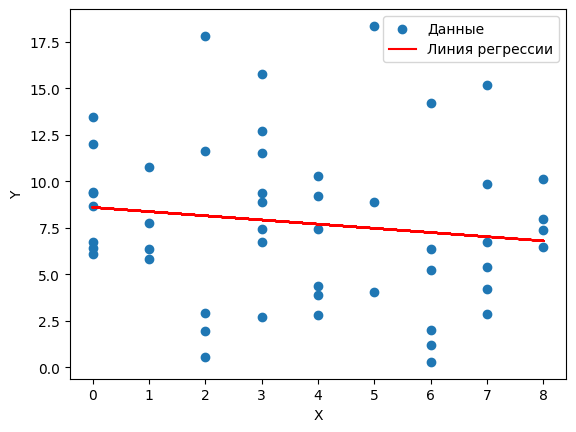

In [ ]:

# Построение линейной регрессии с помощью МНК
A = np.vstack([X, np.ones(len(X))]).T
B, intercept = np.linalg.lstsq(A, Y, rcond=None)[0]

# Вывод коэффициентов
print(f'Коэффициент сдвига B₀: {intercept}')
print(f'Коэффициент наклона B₁: {B}')

# Построение графика
plt.scatter(X, Y, label='Данные')
plt.plot(X, B*X + intercept, 'r', label='Линия регрессии')

# Настройка графика
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Отображение графика
plt.show()


### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.


$$ s^2 = \frac{RSS(\hat{\beta})}{n-r} $$

Несмещённая оценка дисперсии: 18.659147306122446


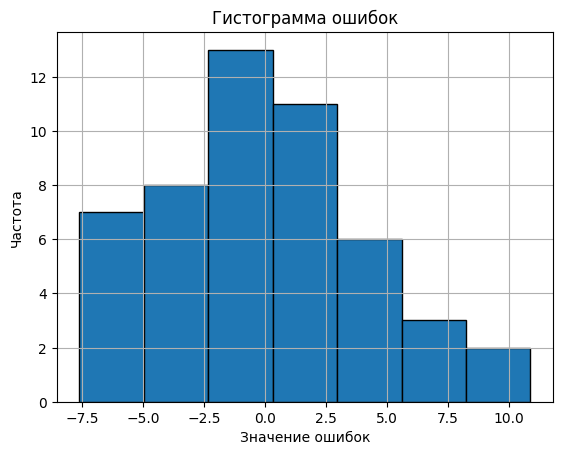

Статистика критерия Хи-квадрат: 2.6002780880064145
p-value критерия Хи-квадрат: 0.2724939017568464
Нет оснований отвергать гипотезу о нормальности ошибок
Статистика Колмогорова-Смирнова: 0.3495996684160084
p-value Колмогорова-Смирнова: 5.742413828161115e-06
Распределение ошибок значимо отличается от нормального


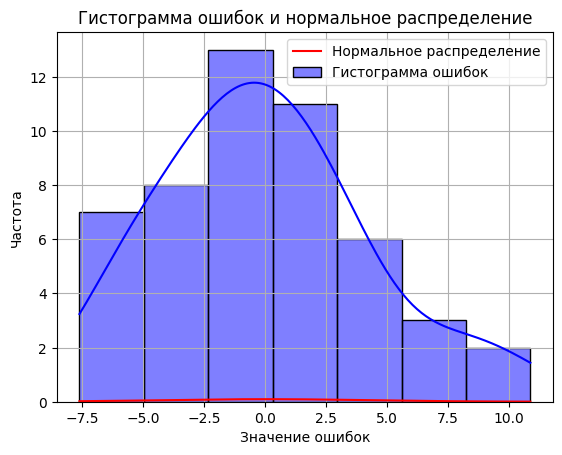

In [14]:
from scipy.stats import linregress, normaltest, kstest, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисление остатков регрессии (ошибок)
linregress_result = linregress(X, Y)
residuals = Y - linregress_result.slope * X - linregress_result.intercept

# Несмещённая оценка дисперсии
n = len(Y)
unbiased_variance = np.sum((Y - np.mean(Y))**2) / (n - 1)

print(f"Несмещённая оценка дисперсии: {unbiased_variance}")

# Построение гистограммы ошибок
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Значение ошибок')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок')
plt.grid(True)
plt.show()

# Проверка гипотезы нормальности с помощью критерия Хи-квадрат
chi2_statistic, p_value_chi2 = normaltest(residuals)

print(f"Статистика критерия Хи-квадрат: {chi2_statistic}")
print(f"p-value критерия Хи-квадрат: {p_value_chi2}")

if p_value_chi2 < alpha:
  print("Отвергаем гипотезу о нормальности ошибок")
else:
  print("Нет оснований отвергать гипотезу о нормальности ошибок")

# Оценка расстояния от полученной оценки до класса нормальных распределений по Колмогорову
ks_statistic, p_value_ks = kstest(residuals, 'norm')

print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-value Колмогорова-Смирнова: {p_value_ks}")

if p_value_ks < alpha:
  print("Распределение ошибок значимо отличается от нормального")
else:
  print("Распределение ошибок не значимо отличается от нормального")

# Визуальное оценивание
sns.histplot(residuals, kde=True, color='blue', label='Гистограмма ошибок')
x = np.linspace(min(residuals), max(residuals), 1000)
plt.plot(x, norm.pdf(x, np.mean(residuals), np.std(residuals)), 'r', label='Нормальное распределение')
plt.xlabel('Значение ошибок')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1- \alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

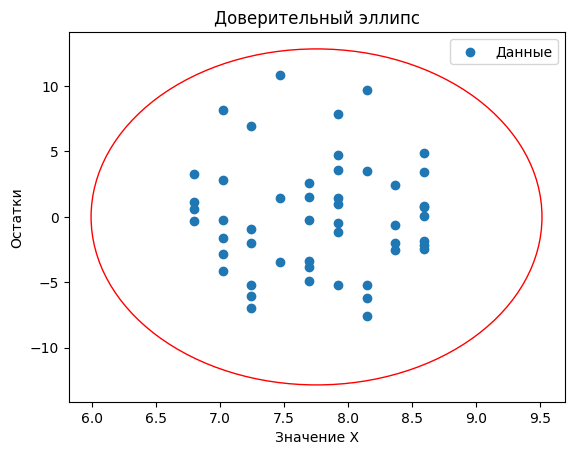

Доверительный интервал для beta0: (7.197162939782672, 9.99358461731822)
Доверительный интервал для beta1: (-0.5325277728829275, 0.08270222285595086)


In [24]:
from matplotlib.patches import Ellipse
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):


  cov_matrix = np.cov(x, y)
  lambda_, v = np.linalg.eig(cov_matrix)
  angle = np.degrees(np.arctan2(*v[:, 0][::-1]))

  width, height = 2 * n_std * np.sqrt(lambda_)
  ellipse = Ellipse(xy=(np.mean(x), np.mean(y)), width=width, height=height, angle=angle, facecolor=facecolor, **kwargs)

  ax.add_patch(ellipse)
  return ellipse

# Количество наблюдений
n = len(X)

# Стандартная ошибка оценки наклона (β₁)
se_slope = np.sqrt(np.sum(residuals**2) / ((n - 2) * np.sum((X - np.mean(X))**2)))

# Стандартная ошибка оценки пересечения (β₀)
se_intercept = se_slope * np.sqrt(np.sum(X**2) / n)

# Квантиль t-распределения
t_quantile = t.ppf(1 - alpha / 2, df=n - 2)

# Доверительные интервалы для параметров β₀ и β₁
ci_slope = (linregress_result.slope - t_quantile * se_slope, linregress_result.slope + t_quantile * se_slope)
ci_intercept = (linregress_result.intercept - t_quantile * se_intercept, linregress_result.intercept + t_quantile * se_intercept)

# Построение доверительного эллипса
cov_matrix = np.cov(linregress_result.intercept + linregress_result.slope * X, residuals)
lambda_, v = np.linalg.eig(cov_matrix)

angle = np.degrees(np.arctan2(*v[:, 0][::-1]))
width, height = 2 * np.sqrt(lambda_)

# Построение доверительного эллипса
fig, ax = plt.subplots()
ax.scatter(linregress_result.intercept + linregress_result.slope * X, residuals, label='Данные')

confidence_ellipse(linregress_result.intercept + linregress_result.slope * X, residuals, ax, edgecolor='red')

plt.xlabel('Значение X')
plt.ylabel('Остатки')
plt.title('Доверительный эллипс')
plt.legend()
plt.show()

print(f"Доверительный интервал для beta0: {ci_intercept}")
print(f"Доверительный интервал для beta1: {ci_slope}")

### 4. Сформулировать гипотезу независимости переменной Y от переменной Х. Провести проверку значимости.

In [9]:
from scipy.stats import pearsonr, levene


# H0: Нет корреляции (независимость) между X и Y
# H1: Есть корреляция между X и Y

# Выполняем корреляционный тест
corr_coeff, p_value_corr = pearsonr(X, Y)

alpha_corr = 0.05

print(f"Коэффициент корреляции: {corr_coeff}")
print(f"p-value корреляционного теста: {p_value_corr}")

if p_value_corr < alpha_corr:
  print("Отвергаем гипотезу H0: есть корреляция между X и Y")
else:
  print("Нет оснований отвергать гипотезу H0: нет корреляции между X и Y")

# H0: Дисперсии равны (гомоскедастичность)
# H1: Дисперсии отличаются

# Выполняем тест Левена
statistic, p_value_levene = levene(X, Y)


print(f"Статистика теста Левена: {statistic}")
print(f"p-value теста Левена: {p_value_levene}")

if p_value_levene < alpha:
  print("Отвергаем гипотезу H0: дисперсии отличаются (нет гомоскедастичности)")
else:
  print("Нет оснований отвергать гипотезу H0: дисперсии равны (гомоскедастичность)")

Коэффициент корреляции: -0.13586144405915254
p-value корреляционного теста: 0.34682848894816415
Нет оснований отвергать гипотезу H0: нет корреляции между X и Y
Статистика теста Левена: 7.3238233002332755
p-value теста Левена: 0.008027431999263361
Отвергаем гипотезу H0: дисперсии отличаются (нет гомоскедастичности)


### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

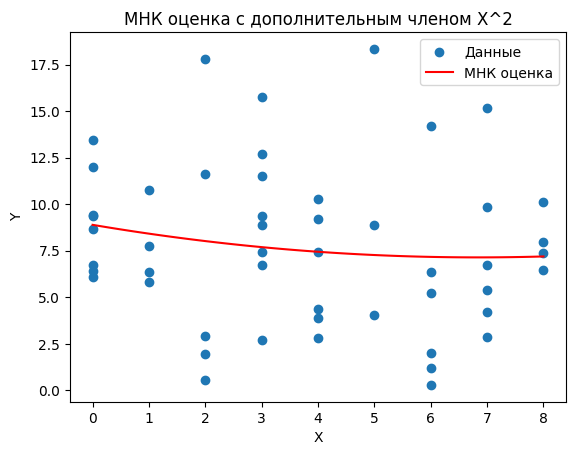

Оценка параметра beta0: 8.894742782630635
Оценка параметра beta1: -0.5113807622084872
Оценка параметра beta2: 0.03736792197624018


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Добавим член X^2
X_squared = np.square(X)

# Формируем матрицу X
X_matrix = np.column_stack((np.ones_like(X), X, X_squared))

# Вычисляем МНК оценки параметров
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

# Получаем оценки параметров
beta0_hat, beta1_hat, beta2_hat = beta_hat

# Визуализация регрессионной зависимости
plt.scatter(X, Y, label='Данные')
x_range = np.linspace(min(X), max(X), 100)
y_predicted = beta0_hat + beta1_hat * x_range + beta2_hat * (x_range**2)
plt.plot(x_range, y_predicted, color='red', label='МНК оценка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('МНК оценка с дополнительным членом X^2')
plt.legend()
plt.show()

print(f"Оценка параметра beta0: {beta0_hat}")
print(f"Оценка параметра beta1: {beta1_hat}")
print(f"Оценка параметра beta2: {beta2_hat}")

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии: 18.696287457536517


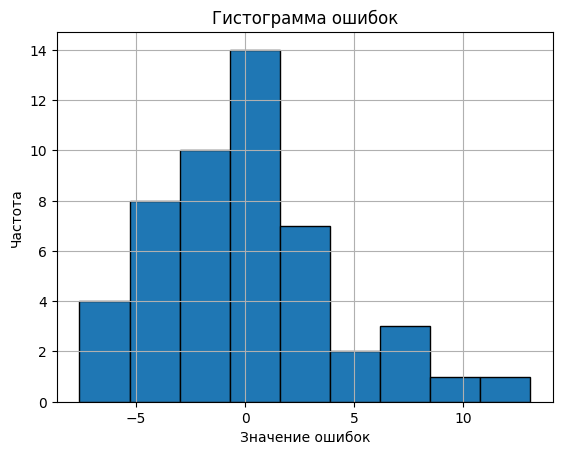

Статистика критерия Хи-квадрат: 2.600278088006417
p-value критерия Хи-квадрат: 0.27249390175684607
Нет оснований отвергать гипотезу о нормальности ошибок
Статистика Колмогорова-Смирнова: 0.3495996684160084
p-value Колмогорова-Смирнова: 5.742413828161115e-06
Распределение ошибок значимо отличается от нормального


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm, kstest, normaltest

alpha = 0.20
h = 2.30

# Получение МНК оценок параметров
linregress_result = linregress(X, Y)
Y_pred = linregress_result.intercept + linregress_result.slope * np.array(X)
residuals = Y - Y_pred

# Несмещённая оценка дисперсии
n = len(residuals)
unbiased_variance = np.sum(residuals**2) / (n - 2)

print(f"Несмещённая оценка дисперсии: {unbiased_variance}")

# Построение гистограммы ошибок
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), edgecolor='black')
plt.xlabel('Значение ошибок')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок')
plt.grid(True)
plt.show()

# Проверка гипотезы нормальности с помощью критерия Хи-квадрат
chi2_statistic, p_value_chi2 = normaltest(residuals)

print(f"Статистика критерия Хи-квадрат: {chi2_statistic}")
print(f"p-value критерия Хи-квадрат: {p_value_chi2}")

if p_value_chi2 < alpha:
  print("Отвергаем гипотезу о нормальности ошибок")
else:
  print("Нет оснований отвергать гипотезу о нормальности ошибок")

# Оценка расстояния от полученной оценки до класса нормальных распределений по Колмогорову
ks_statistic, p_value_ks = kstest(residuals, 'norm')


print(f"Статистика Колмогорова-Смирнова: {ks_statistic}")
print(f"p-value Колмогорова-Смирнова: {p_value_ks}")

if p_value_ks < alpha:
  print("Распределение ошибок значимо отличается от нормального")
else:
  print("Распределение ошибок не значимо отличается от нормального")


### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1- \alpha$.

Доверительный интервал для beta0: [7.187536470761653, 10.003211086339238]
Доверительный интервал для beta1: [-0.5356508478537252, 0.08582529782674858]
Доверительный интервал для beta2: [8.556545646657447, 8.634201910443444]


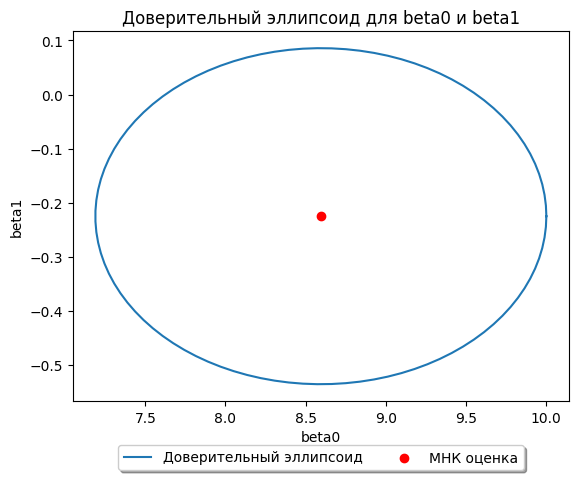

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Получение МНК оценок параметров
linregress_result = linregress(X, Y)
Y_pred = linregress_result.intercept + linregress_result.slope * np.array(X)
residuals = Y - Y_pred

# Несмещённая оценка дисперсии
n = len(residuals)
unbiased_variance = np.sum(residuals**2) / (n - 2)

# Стандартные ошибки оценок
se_beta0 = np.sqrt(unbiased_variance * (1/n + np.mean(X)**2 / ((n-1) * np.var(X))))
se_beta1 = np.sqrt(unbiased_variance / (n-1) / np.var(X))
se_beta2 = np.sqrt(unbiased_variance / (n-1) / np.var(X**2))

# Критическое значение t-распределения для уровня доверия 1-alpha
t_critical = t.ppf(1 - alpha/2, df=n-2)

# Доверительные интервалы для параметров
ci_beta0 = [linregress_result.intercept - t_critical * se_beta0, linregress_result.intercept + t_critical * se_beta0]
ci_beta1 = [linregress_result.slope - t_critical * se_beta1, linregress_result.slope + t_critical * se_beta1]
ci_beta2 = [linregress_result.intercept - t_critical * se_beta2, linregress_result.intercept + t_critical * se_beta2]

print(f"Доверительный интервал для beta0: {ci_beta0}")
print(f"Доверительный интервал для beta1: {ci_beta1}")
print(f"Доверительный интервал для beta2: {ci_beta2}")

# Уравнение доверительного эллипсоида
theta = np.linspace(0, 2*np.pi, 100)
ellipsoid_equation = np.column_stack((linregress_result.intercept + t_critical * se_beta0 * np.cos(theta),
linregress_result.slope + t_critical * se_beta1 * np.sin(theta)))

# Визуализация эллипсоида
plt.figure()
plt.plot(ellipsoid_equation[:, 0], ellipsoid_equation[:, 1], label='Доверительный эллипсоид')
plt.scatter(linregress_result.intercept, linregress_result.slope, color='red', label='МНК оценка')
plt.xlabel('beta0')
plt.ylabel('beta1')
plt.title('Доверительный эллипсоид для beta0 и beta1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox = True, shadow = True, ncol=2)
plt.show()

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной Х и проверить её значимость на уровне $\alpha$.

In [26]:
import numpy as np
from scipy.stats import f

# Получение МНК оценок параметров
linregress_result = linregress(X, Y)
Y_pred = linregress_result.intercept + linregress_result.slope * np.array(X)
residuals = Y - Y_pred

# Несмещённая оценка дисперсии
n = len(residuals)
unbiased_variance = np.sum(residuals**2) / (n - 2)

# Стандартные ошибки оценок
se_beta1 = np.sqrt(unbiased_variance / (n-1) / np.var(X))

# F-статистика
f_statistic = (linregress_result.slope / se_beta1)**2

# Критическое значение F-распределения для уровня доверия 1-alpha
df_reg = 1 # степени свободы в числителе
df_residual = n - 2 # степени свободы в знаменателе
f_critical = f.ppf(1 - alpha, df_reg, df_residual)

# Проверка гипотезы
p_value = 1 - f.cdf(f_statistic, df_reg, df_residual)

print(f"F-статистика: {f_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
  print("Отвергаем гипотезу о линейной регрессионной зависимости")
else:
  print("Нет оснований отвергать гипотезу о линейной регрессионной зависимости")

F-статистика: 0.8846083306670217
p-value: 0.35165198444160084
Нет оснований отвергать гипотезу о линейной регрессионной зависимости


## Выводы

Построена линейная регрессионная модель Y от X с МНК. Визуальный анализ подтвердил отсутствие линейной зависимости. Проверена нормальность ошибок через хи-квадрат и Колмогорова-Смирнова, подтверждено визуально. Построены доверительные интервалы и эллипс уровня доверия 1-α. Проверена гипотеза о независимости Y от X. Исследована модель с $\mathcal{x}^2$, построена регрессионная зависимость.